In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np

In [5]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [6]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, x_train, y_train)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,x_test, y_test)

In [9]:
print("Training data shape: ", X_train_2classes.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test_2classes.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (11686, 784)
Test data shape (1920, 784)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values
    
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

In [11]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.9895833333333334

In [17]:
X_2classes=np.concatenate((X_test_2classes,X_train_2classes),axis=0)
Y_2classes=np.concatenate((Y_test_2classes,Y_train_2classes),axis=0)
X_2classes.shape,Y_2classes.shape

((13606, 784), (13606,))

In [0]:
from sklearn.model_selection import KFold
def kvalid(k):
  kf = KFold(n_splits=k)
  accuracy_score_train=0
  accuracy_score_test=0
  count=0
  for train_index, test_index in kf.split(X_2classes):
    X_train, X_test = X_2classes[train_index], X_2classes[test_index]
    y_train, y_test = Y_2classes[train_index], Y_2classes[test_index]
    count+=1
    calc_train=calc_accuracy(X_train,X_train,y_train,y_train)
    calc_test=calc_accuracy(X_train,X_test,y_train,y_test)
    accuracy_score_train+=calc_train
    accuracy_score_test+=calc_test
  return accuracy_score_train/count,accuracy_score_test/count

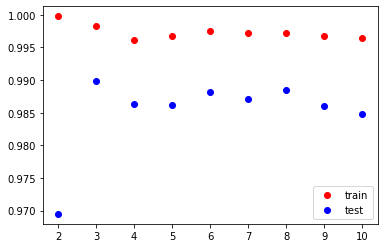

In [57]:
import matplotlib.pyplot as plt
acc_train=[]
acc_test=[]
for i in range(2,11):
  acc_train_,acc_test_=kvalid(i)
  acc_train.append(acc_train_)
  acc_test.append(acc_test_)
tr=plt.scatter(range(2,11),acc_train,color='red')
te=plt.scatter(range(2,11),acc_test,color='blue')
plt.legend((tr,te),("train","test"),loc="lower right")
plt.show()
